## 2.2 Análisis de Opiniones sobre Películas

El análisis de sentimiento (o minería de opiniones) se refiere al proceso de extraer información acerca de la actitud que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un tópico o contexto de comunicación.

Los datos que se usarán corresponden a un subconjunto de los datos publicados en Kaggle, en el contexto de una competencia organizada por la Universidad de Stanford. Cada registro disponible correspondería a una opinión sobre una película, registrada sobre el sitio Rotten Tomatoes. Para empezar se limitará a estudiar textos anotados como positivos o negativos, clases que se codificarán como +1 y 0 respectivamente. Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, se va a necesitar representar los textos disponibles como vectores de características (features). El tipo de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en el texto. Para esto, se necesita un vocabulario que, para esta actividad, se construirá mediante la unión de todas las palabras que observemos en los textos que se tienen a disposición. Para aumentar la eficacia de las características extraídas es conveniente ejecutar algunas técnicas de pre-procesamiento básicas como: pasar todo el texto a minúsculas (lower-casing), eliminar signos de puntuación y eliminar palabras sin significado como artículos, pronombres y preposiciones (stop word removal). Otra técnica que suele ser útil para obtener buenas características (features) es la lematización, es decir la reducción de todas las palabras a su tronco léxico base. Una técnica similar y más utilizada en la práctica es el stemming.


### 2.2.a. Construcción de dataframe con los datos a analizar.

In [1]:
#2.a
import urllib
import pandas as pd
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
positivo_train=0
negativo_train=0
for x in train_df['Sentiment']:
    if x==-1:
        negativo_train+=1
    if x==+1:
        positivo_train+=1
print "Sentimiento negativo en los datos de entrenamiento: %d"%negativo_train
print "Sentimiento positivo en los datos de entrenamiento: %d"%positivo_train
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
positivo_test=0
negativo_test=0
for x in test_df['Sentiment']:
    if x==-1:
        negativo_test+=1
    if x==1:
        positivo_test+=1
print "Sentimiento negativo en los datos de prueba: %d"%negativo_test
print "Sentimiento positivo en los datos de prueba: %d"%positivo_test
print train_df.shape
print test_df.shape

Sentimiento negativo en los datos de entrenamiento: 1803
Sentimiento positivo en los datos de entrenamiento: 1751
Sentimiento negativo en los datos de prueba: 1803
Sentimiento positivo en los datos de prueba: 1751
(3554, 2)
(3554, 2)


Como se observa en el resultado, existen una cantidad de 3554 registros de prueba al igual que de entrenamiento. Estas se dividen en 1803 que se clasifican como negativos y 1751 como positivos en ambos sets de datos.



### 2.2.b. Construcción y evaluación de una función con lower-casing y stemming.

In [2]:
#2.b
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
        #wordlemmatizer = WordNetLemmatizer()
        stemmer = PorterStemmer()
        commonwords = stopwords.words('english')
        text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
        words = ""
        wordtokens = [ stemmer.stem(word.lower()) \
                                for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
        for word in wordtokens:
                if word not in commonwords:
                                words+=" "+word
        return words

print "**************Stemmer****************"
print word_extractor("I love to eat cake")
print "I love to eat cake"
print "************************************"
print word_extractor("I love eating cake")
print "I love eating cake"
print "************************************"
print word_extractor("I loved eating the cake")
print "I loved eating the cake"
print "************************************"
print word_extractor("I do not love eating cake")
print "I do not love eating cake"
print "************************************"
print word_extractor("I don't love eating cake")
print "I don't love eating cake"
print "************************************"
print word_extractor("I hate this work")
print "I hate this work"
print "************************************"
print word_extractor("Steamming is a bad choice")
print "Steamming is a bad choice"
print "************************************"
print word_extractor("lEMMATIZER IS a bad choice")
print "lEMMATIZER IS a bad choice"
print "************************************"
print word_extractor("this not work") 
print "this not work"
print "************************************"
print word_extractor("I'm WoRkInG") 
print "I'm WoRkInG"
print "************************************"
print word_extractor("walking to the walker, , walked wall. . ...") 
print "walking to the walker, , walked wall. . ..."
print "************************************"

**************Stemmer****************
 love eat cake
I love to eat cake
************************************
 love eat cake
I love eating cake
************************************
 love eat cake
I loved eating the cake
************************************
 love eat cake
I do not love eating cake
************************************
 n't love eat cake
I don't love eating cake
************************************
 hate thi work
I hate this work
************************************
 steam bad choic
Steamming is a bad choice
************************************
 lemmat bad choic
lEMMATIZER IS a bad choice
************************************
 thi work
this not work
************************************
 'm work
I'm WoRkInG
************************************
 walk walker , , walk wall . . ...
walking to the walker, , walked wall. . ...
************************************


Como se observa en los ejemplos, Stemmer es capaz de detectar las palabras sin significado explícito (pronombres, artículos, preposiciones) y las elimina del texto, además, de traspasar todo el texto a minúsculas e identifica los signos de puntuación y comas (aunque estén separados o unidos a una palabra). Aun así, tiene problemas con textos en donde se abrevian palabras (como por ejemplo el don't y do not). También, es capaz de reducir algunas de las palabras y sus conjugaciones a su forma "atómica" para poder considerarlas dentro de un mismo grupo, como por ejemplo los verbos "love","walk" y "eat".



### 2.2.c. Construcción y evaluacón de una función con lematice.

In [3]:
# 2.c
def word_extractor2(text):
        wordlemmatizer = WordNetLemmatizer()
        commonwords = stopwords.words('english')
        text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
        words = ""
        wordtokens = [ wordlemmatizer.lemmatize(word.lower()) \
                                for word in word_tokenize(text.decode('utf-8','ignore')) ]
        for word in wordtokens:
                if word not in commonwords:
                                words+=" "+word
        return words
    
print "*********Lemmatizer**********"
print word_extractor2("I love to eat cake")
print "I love to eat cake"
print "************************************"
print word_extractor2("I love eating cake")
print "I love eating cake"
print "************************************"
print word_extractor2("I loved eating the cake")
print "I loved eating the cake"
print "************************************"
print word_extractor2("I do not love eating cake")
print "I do not love eating cake"
print "************************************"
print word_extractor2("I don't love eating cake")
print "I don't love eating cake"
print "************************************"
print word_extractor2("I hate this work")
print "I hate this work"
print "************************************"
print word_extractor2("Steamming is a bad choice")
print "Steamming is a bad choice"
print "************************************"
print word_extractor2("lEMMATIZER IS a bad choice")
print "lEMMATIZER IS a bad choice"
print "************************************"
print word_extractor2("this not work") 
print "this not work"
print "************************************"
print word_extractor2("I'm WoRkInG") 
print "I'm WoRkInG"
print "************************************"
print word_extractor2("walking to the walker, , walked wall. . ...") 
print "walking to the walker, , walked wall. . ..."
print "************************************"

print "PALBRA: 'This'"
print "LEMMATIZER: '" +word_extractor2("This")+"'"
print "STEMMER: '" +word_extractor("This")+"'"


print "PALBRA: 'Movie'"
print "LEMMATIZER: '" +word_extractor2("Movie")+"'"
print "STEMMER: '" +word_extractor("Movie")+"'"

*********Lemmatizer**********
 love eat cake
I love to eat cake
************************************
 love eating cake
I love eating cake
************************************
 loved eating cake
I loved eating the cake
************************************
 love eating cake
I do not love eating cake
************************************
 n't love eating cake
I don't love eating cake
************************************
 hate work
I hate this work
************************************
 steamming bad choice
Steamming is a bad choice
************************************
 lemmatizer bad choice
lEMMATIZER IS a bad choice
************************************
 work
this not work
************************************
 'm working
I'm WoRkInG
************************************
 walking walker , , walked wall . . ...
walking to the walker, , walked wall. . ...
************************************
PALBRA: 'This'
LEMMATIZER: ''
STEMMER: ' thi'
PALBRA: 'Movie'
LEMMATIZER: ' movie'
STEMMER: ' movi'


Se puede observar que lematizar las palabras produce un resultado similar a stemming + lower-casing, con las mismas dificultades en las palabras con abreviaciones, pero sin llevar las palabras a un mismo "tronco lingüístico" por lo que se contabilizan como palabras diferentes o sin relación todas las conjugaciones de, por ejemplo, la palabra "love"/"loved". Por último, una diferencia entre ambos en la reducción de pronombres, como por ejemplo, en la palabra "This" en donde lemmatizer la elimina totalmente, en cambio stemmer la mantiene como una base "thi".



### 2.2.d. Explorando el vocabulario y determinando las palabras más frecuentes.

In [4]:
#2.d
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
mini = 200
#Stemmer
print "**************Stemmer****************"
print ""
print "--------------Train------------------"
print ""
texts_train = [word_extractor(text) for text in train_df.Text]
texts_test = [word_extractor(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
auxiliar = 0
n_datos = 0
maximo = 0
for tag, count in zip(vocab, dist):
    n_datos+=1
    auxiliar+=count
    if count>maximo:
        maximo=count
promedio=float(auxiliar)/float(n_datos)
utilizadas_train =[]
for tag, count in zip(vocab, dist):
    if count>(promedio+mini):
        utilizadas_train.append([tag,count])
print utilizadas_train
print ""
print ""
print "---------------Test-------------------"
print ""
auxiliar_test = 0
n_datos_test = 0
maximo_test = 0
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))
for tag, count in zip(vocab, dist_test):
    n_datos_test+=1
    auxiliar_test+=count
    if count>maximo_test:
        maximo_test=count
promedio_test=float(auxiliar_test)/float(n_datos_test)
utilizadas_test =[]
for tag, count in zip(vocab, dist_test):
    if count>(promedio_test+mini):
        utilizadas_test.append([tag,count])
print utilizadas_test
print ""
print ""
print ""
#Lemamtizer
print "*********Lemmatizer**********"
print ""
print "-----------Train-------------"
print ""
texts_train_lem = [word_extractor2(text) for text in train_df.Text]
texts_test_lem = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train_lem = vectorizer.transform(texts_train_lem)
features_test_lem = vectorizer.transform(texts_test_lem)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train_lem.sum(axis=0)).reshape(-1,))
auxiliar = 0
n_datos = 0
maximo = 0
for tag, count in zip(vocab, dist):
    n_datos+=1
    auxiliar+=count
    if count>maximo:
        maximo=count
promedio=float(auxiliar)/float(n_datos)
utilizadas_train_lem =[]
for tag, count in zip(vocab, dist):
    if count>(promedio+mini):
        utilizadas_train_lem.append([tag,count])
print utilizadas_train_lem
print ""
print "------------Test--------------"
print ""
auxiliar_test = 0
n_datos_test = 0
maximo_test = 0
dist_test = list(np.array(features_test_lem.sum(axis=0)).reshape(-1,))
for tag, count in zip(vocab, dist_test):
    n_datos_test+=1
    auxiliar_test+=count
    if count>maximo_test:
        maximo_test=count
promedio_test=float(auxiliar_test)/float(n_datos_test)
utilizadas_test_lem =[]
for tag, count in zip(vocab, dist_test):
    if count>(promedio_test+mini):
        utilizadas_test_lem.append([tag,count])
print utilizadas_test_lem

**************Stemmer****************

--------------Train------------------

[[u'film', 572], [u'ha', 238], [u'like', 248], [u'movi', 530], [u'one', 250], [u'thi', 514]]


---------------Test-------------------

[[u'film', 572], [u'ha', 238], [u'like', 248], [u'movi', 530], [u'one', 250], [u'thi', 514]]



*********Lemmatizer**********

-----------Train-------------

[[u'film', 558], [u'ha', 238], [u'like', 230], [u'movie', 540], [u'one', 250]]

------------Test--------------

[[u'film', 558], [u'ha', 238], [u'like', 230], [u'movie', 540], [u'one', 250]]


Según lo obtenido por Stemmer, las palabras más frecuentes en ambos sets son "film" 572 veces, "movie" 530 veces, "one" 250 veces, "like" 248 veces, "ha"(que probablemente sea la el tronco lingüístico del verbo "has"(tiene)) 238 veces  y "thi"(que probablemente sea la abreviación de "this") con 514 veces.

Por otro lado, Lemmatizer obtiene con mayor frecuencia para ambos sets de datos las palabras "film"(558) , "ha"(238), "like"(230), "movie"(540), "one"(250).

Al comparar ambos resultados se puede dar cuenta de que la mayoría de las palabras se repiten, algunas contabilizadas la misma cantidad de veces y otras como "thi" eliminada en Lemmatizer por no tener relevancia para el análisis. 

Cabe agregar que Stemmer empeora algunas palabras (como "movie"->"movi") lo que puede empeorar la contabilización. Esto se puede deber a que considera que algunas palabras son plurales de forma erronea, generando equivocaciones en los conteos y creando nuevos "troncos lingüísticos" inexistentes.



### 2.2.e. Explicación de las métricas que calcula la función classification report.

In [5]:
#2.e
from sklearn.metrics import classification_report

accuracy_dict_train={}
accuracy_dict_test={}
contador_universal_svm=0
contador_universal_logistic=0

def score_the_model(model,x,y,xt,yt,text):
    global accuracy_dict_test
    global accuracy_dict_train
    global contador_universal_logistic
    global contador_universal_svm
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    if text!="LOGISTIC" and text!="SVM":
        accuracy_dict_train[text+"_train"]=acc_tr
        accuracy_dict_test[text+"_test"]=acc_test
    if text=="LOGISTIC":
        contador_universal_logistic+=1
        accuracy_dict_train[text+"_train_"+str(contador_universal_logistic)]=acc_tr
        accuracy_dict_test[text+"_test_"+str(contador_universal_logistic)]=acc_test
    if text=="SVM":
        contador_universal_svm+=1
        accuracy_dict_train[text+"_train_"+str(contador_universal_svm)]=acc_tr
        accuracy_dict_test[text+"_test_"+str(contador_universal_svm)]=acc_test
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

La función classification_report entrega 4 métricas que corresponden a precision, recall, f1-score y support. La métrica “precision” corresponde a la fracción de casos recuperados que son relevantes, mientras que la métrica “recall” (también conocido como sensibilidad) es la fracción de los casos pertinentes que se recuperan. Estas 2 métricas se basan en una comprensión y medida de relevancia. Por otro lado la métrica “f1-score” es una medida de la precisión en una prueba, este puntaje se calcula como $F1-score = \frac{2\cdot(precision\cdot recall)}{precision+recall}$. F1-score se puede interpretar como un promedio ponderado de la precision y el recall. Por último la métrica “support” indica cuantos valores corresponden a una cierta clase.


### 2.2.f. Predicción de sentimientos mediante un clasificador Bayesiano Ingenuo (Binario).

In [6]:
#2.f
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

#Stemmer

print "Stemmer:"
print " "
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text
    
#Lemmatizer

print "--------------------------------------------"
print "Lemmatizer:"
print " "
model_lem=do_NAIVE_BAYES(features_train_lem,labels_train,features_test_lem,labels_test)
test_pred_lem = model_lem.predict_proba(features_test_lem)
spl = random.sample(xrange(len(test_pred_lem)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred_lem[spl]):
    print sentiment, text

Stemmer:
 
Training Accuracy BernoulliNB: 0.932752
Test Accuracy BernoulliNB: 0.932733
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.92      0.95      0.93      1803
          -       0.94      0.92      0.93      1751

avg / total       0.93      0.93      0.93      3554

[ 0.97121959  0.02878041] it's all pretty tame . the most offensive thing about the movie is that hollywood expects people to pay to see it .

[ 0.6456771  0.3543229] it is , by conventional standards , a fairly terrible movie . . . but it is also weirdly fascinating , a ready-made eurotrash cult object . it is also , at times , curiously moving .

[ 0.92221791  0.07778209] . . . while certainly clever in spots , this too-long , spoofy update of shakespeare's macbeth doesn't sustain a high enough level of invention .

[ 0.94946154  0.05053846] there's only one way to kill michael myers for good : stop buying tickets to these movies .

[ 0.01055554  0.9

Dado los resultados, utilizando el clasificador Bayesiano Ingenuo en Stemmer, se obtiene un Accuracy para los datos de entrenamiento de 0.932752 y un Accuracy para los datos de prueba de 0.932733, la diferencia en rendimiento entre ambos datos es casi insignificante. En el caso de Lemmatizer, se obtiene un Accuracy para los datos de entrenamiento de 0.875914 y un Accuracy para los datos de prueba de 0.875880, al igual que antes, la diferencia tambien es casi insignificante, ahora, comparando Stemmer vs Lemmatizer, se observa que Lemmatizer obtiene un rendimiento superior, pero solo por una diferencia cercana al 6% tanto en los datos de entrenamiento como los de prueba. 

Respecto a las metricas dadas por classification_report, tanto la precision, el recall y el f1-score para las 2 clases de sentimientos, se obtiene un valor muy cercano al accuracy obtenido anteriormiente, tanto para los datos de entrenamiento como los de prueba. Por otro lado, se vuelve a observar que Lemmatizer obtiene un rendimiento superior.

Finalmente se obtiene un valor entre 0 y 1 tanto para el sentimiento positivo como negativo junto con la frase donde fue clasificado el sentimiento de la forma [negativo positivo]. Como se puede notar tanto para Stemmer como Lemmatizer, se clasifica de buena manera el grado del sentimiento para cada comentario. 

### 2.2.g. Predicción de sentimientos mediante un clasificador Bayesiano Multinomial.

In [7]:
#2.g
from sklearn.naive_bayes import MultinomialNB
import random
def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model

#Stemmer

print "Stemmer"
print " "
model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

#Lemmatizer
print "--------------------------------------------"
print "Lemmatizer"
print " "
model_lem=do_MULTINOMIAL(features_train_lem,labels_train,features_test_lem,labels_test)
test_pred_lem = model_lem.predict_proba(features_test_lem)
spl = random.sample(xrange(len(test_pred_lem)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred_lem[spl]):
    print sentiment, text

Stemmer
 
Training Accuracy MULTINOMIAL: 0.933596
Test Accuracy MULTINOMIAL: 0.933577
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.93      0.94      0.93      1803
          -       0.94      0.93      0.93      1751

avg / total       0.93      0.93      0.93      3554

[ 0.99231763  0.00768237] the movie would seem less of a trifle if ms . sugarman followed through on her defiance of the saccharine .

[ 0.98766417  0.01233583] so faithful to the doldrums of the not-quite-urban , not-quite-suburban milieu as to have viewers recoiling from the reality check .

[ 0.01855483  0.98144517] a vibrant , colorful , semimusical rendition .

[ 0.14594286  0.85405714] feral and uncomfortable .

[ 0.26671077  0.73328923] the movie should be credited with remembering his victims .

[ 0.03165645  0.96834355] the chateau is a risky venture that never quite goes where you expect and often surprises you with unexpected comedy .

[ 0.16

Dado los resultados, utilizando el clasificador Bayesiano Ingenuo Multinomial en Stemmer, se obtiene un Accuracy para los datos de entrenamiento de 0.933596 y un Accuracy para los datos de prueba de 0.933577, la diferencia en rendimiento entre ambos datos es casi insignificante. En el caso de Lemmatizer, se obtiene un Accuracy para los datos de entrenamiento de 0.877040 y un Accuracy para los datos de prueba de 0.877005, al igual que antes, la diferencia tambien es casi despreciable, ahora, comparando Stemmer vs Lemmatizer, se observa que el segundo obtiene un rendimiento superior, pero solo por una diferencia de cercana al 6% tanto en los datos de entrenamiento como los de prueba. Cabe destacar que el rendimiento mostrado por este clasificador es bastante parejo al clasificador utilizado en la pregunta anterior (Bayesiano Ingenuo Binario). 

Respecto a las metricas dadas por classification_report, tanto la precision, el recall y el f1-score para las 2 clases de sentimientos, se obtiene un valor muy cercano al accuracy obtenido anteriormiente, tanto para los datos de entrenamiento como los de prueba. También se vuelve a observar que Lemmatizer obtiene un rendimiento superior.

Finalmente se obtiene un valor entre 0 y 1 tanto para el sentimiento positivo como negativo junto con la frase donde fue clasificado el sentimiento de la forma [negativo positivo]. Como se puede notar tanto para Stemmer como Lemmatizer, se clasifica de buena manera el grado del sentimiento para cada comentario. Comparando respecto al clasificador utilizado en la pregunta anterior, existe en algunos casos, una mayor diferencia en los valores de los sentimientos negativo y positivo. 


### 2.2.h1. Predicción de sentimientos mediante un modelo de Regresión Logística Regularizado (Penalizando con la norma $l_{2}$)

In [8]:
#2.h1
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xt,yt):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "Usando C = %f"%C
        model = LogisticRegression(penalty='l2',C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"LOGISTIC")
        
#Stemmer

print "Stemmer"
print " "
do_LOGIT(features_train,labels_train,features_test,labels_test)

#Lemmatizer

print "----------"
print "Lemmatizer"
print " "
do_LOGIT(features_train_lem,labels_train,features_test_lem,labels_test)

Stemmer
 
Usando C = 0.010000
Training Accuracy LOGISTIC: 0.787001
Test Accuracy LOGISTIC: 0.786941
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.77      0.84      0.80      1803
          -       0.81      0.74      0.77      1751

avg / total       0.79      0.79      0.79      3554

Usando C = 0.100000
Training Accuracy LOGISTIC: 0.892234
Test Accuracy LOGISTIC: 0.892204
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.88      0.91      0.90      1803
          -       0.90      0.87      0.89      1751

avg / total       0.89      0.89      0.89      3554

Usando C = 10.000000
Training Accuracy LOGISTIC: 0.999156
Test Accuracy LOGISTIC: 0.999156
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       1.00      1.00      1.00      1803
          -       1.00      1.00      1.00      1751

avg / total   

Al observar los resultados utilizando un modelo de Regresión Logística Regularizado con una penalización de [0.01, 0.1, 10, 100, 1000], se puede ver con Stemmer que al penalizar demasiado el modelo, tanto el Accuracy de entrenamiento como el de prueba van empeorando por castigar demasiado. Entonces no es recomendado utilizar un parametro de penalización grande. Estos resultados quedan demostrados nuevamente con las 4 metricas.

Observando los resultados con Lemmatizer, se puede notar un comportamiento similar que en Stemmer. Al aumentar el parametro de penalizacion, el error aumenta, pero este varia mas lentamente que Stemmer, por lo que se puede ver que el castigo realizado es mas leve. Cabe destacar que al comparar el parametro de penalización 100 y 1000, este ultimo tuvo un rendimiento levemente mejor.

Al comparar Stemmer vs Lemmatizer, con los parametros [0.01, 0.1, 10, 100, 1000], Lemmatizer obtiene un mejor rendimiento que Stemmer. Con parametro 0.01 la diferencia de rendimiento es 9% aproximadamente. Con el resto de parametros esta diferencia va disminuyendo, pero aun asi, Lemmatizer tiene siempe un rendimiento levemente mejor que Stemmer.



### 2.2.h2. Predicción de sentimientos mediante una Máquina de Vectores de Soporte (SVM) Lineal.

In [9]:
#2.h2
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "El valor de C que se esta probando: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        
#Stemmer

print "Stemmer"
do_SVM(features_train,labels_train,features_test,labels_test)

#Lematizer

print "----------"
print "Lemmatizer"
do_SVM(features_train_lem,labels_train,features_test_lem,labels_test)

Stemmer
El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.886607
Test Accuracy SVM: 0.886575
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.87      0.91      0.89      1803
          -       0.90      0.87      0.88      1751

avg / total       0.89      0.89      0.89      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.980023
Test Accuracy SVM: 0.980017
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.97      0.99      0.98      1803
          -       0.99      0.97      0.98      1751

avg / total       0.98      0.98      0.98      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 1.000000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       1.00      1.00      1.00      1803
          -       1.00   

Al observar los resultados obtenidos con una Máquina de Vectores de Soporte Lineal con parametros de regularización [0.01, 0.1, 10, 100, 1000] se puede observar resultados similares a los obtenidos en la pregunta anterior, pero estos son mas drásticos, de hecho ya con Stemmer desde el parametro 0.1 en adelante el accuracy ya es muy alto (casi 1) para los datos de entrenamiento como los de prueba. Con Lemmatizer tambien ocurre resultados similares a la pregunta anterior (Regresión Logística Regularizada).

Al comparar Stemmer vs Lemmatizer, con los parametros [0.01, 0.1, 10, 100, 1000], Lemmatizer obtiene un mejor rendimiento que Stemmer. Con parametro 0.01 la diferencia de rendimiento es de 8%-9% aproximadamente. Con el resto de parametros esta diferencia va disminuyendo, pero aun asi, Lemmatizer tiene un rendimiento levemente mejor que Stemmer.


### 2.2.i. Gráfico de comparación resultados entre distintos metodos de clasificación.

Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_3 |     0.999156     |     0.999156
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_2 |     0.892204     |     0.892234
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_1 |     0.786941     |     0.787001
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_7 |     0.805516     |     0.805571
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_6 |     0.719392     |     0.719471
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_5 |     1.000000     |     1.000000
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_4 |     1.000000     |     1.000000
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_9 |     0.984239     |     0.984243
 
Clasificador | Accuracy_test | Accuracy_train
LOGISTIC_test_8 |     0.967352     |     0.967361
 
Clasificador | Accuracy_test | Accuracy_train
MULTINOMIAL_test |     0.877005     |     0.877040
 
Clasificador | Accu

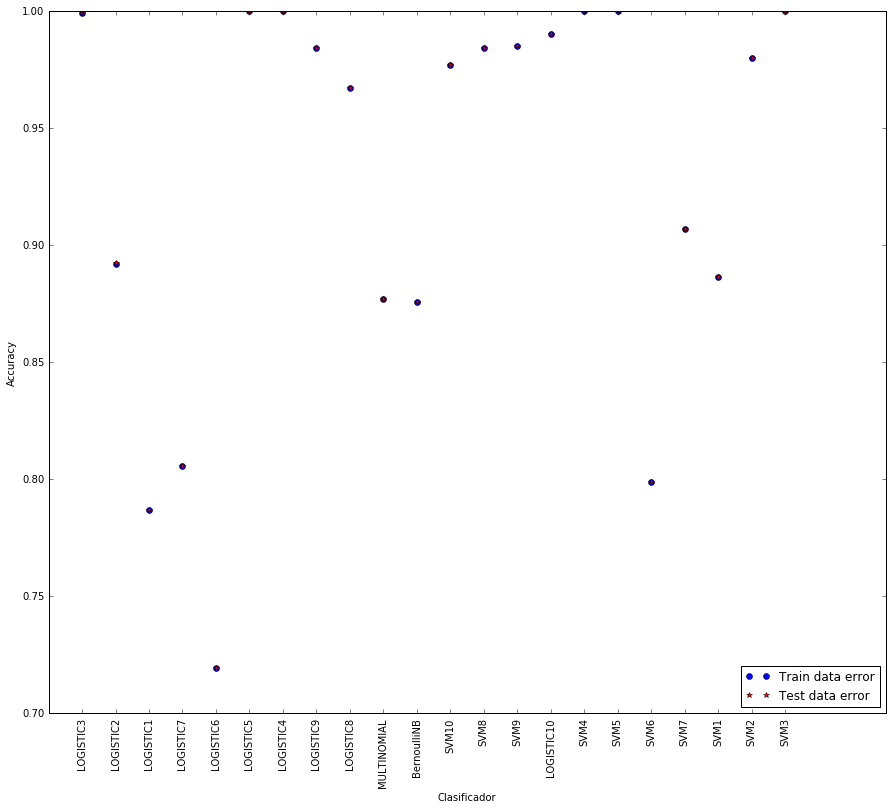

In [17]:
#2.i
import matplotlib.pyplot as plt
%matplotlib inline

label_test = []
label_train =[]
data_test = []
data_train = []
for x in accuracy_dict_test:
    print "Clasificador | Accuracy_test | Accuracy_train"
    aux=x.split("_",2)
    if aux[0]=='LOGISTIC' or aux[0]=='SVM':
        print "%s |     %f     |     %f"%(x, accuracy_dict_test[x],accuracy_dict_train[aux[0]+"_train_"+aux[2]])
        print " "
        label_test.append(x)
        label_train.append(aux[0]+aux[2])
        data_train.append(accuracy_dict_train[aux[0]+"_train_"+aux[2]])
        data_test.append(accuracy_dict_test[x])
    if aux[0]=='BernoulliNB' or aux[0]=='MULTINOMIAL' :
        print "%s |     %f     |     %f"%(x, accuracy_dict_test[x],accuracy_dict_train[aux[0]+"_train"])
        print " "
        label_test.append(x)
        label_train.append(aux[0])
        data_train.append(accuracy_dict_train[aux[0]+"_train"])
        data_test.append(accuracy_dict_test[x])
auxiliar=[]

for i in range(1,len(data_test)+1):
    auxiliar.append(i)
    
plt.figure(figsize=(15,15))
plt.plot(auxiliar, data_test,'o',linestyle=' ', color='b')
plt.plot(auxiliar,data_train , marker='*',linestyle='', color= 'r')
plt.ylabel('Accuracy')
plt.xlabel('Clasificador')
plt.xticks(auxiliar, label_train, rotation=90)
plt.legend(['Train data error', 'Test data error'], loc='lower right')
plt.gcf().subplots_adjust(bottom=0.25)
plt.show()

Luego de construir un gráfico con los 4 métodos de clasificación utilizados en las preguntas anteriores, se puede observar que el error de entrenamiento y de prueba son casi el mismo para cada metodo. Por otro lado, el metodo que obtiene mejor rendimiento a nivel global es Regresión Logistica Regularizada, el cual obtiene un Accurracy de 0.719392 para los datos de prueba y 0.719471 para los datos entrenamiento en el mejor caso. La variacion de rendimiento depende de que parametro de regularizacion se este usando para los métodos de SVM y Regresión Logistica Regularizada. Pero como se analizo en preguntas anteriores, con un parametro de poca magnitud (Por ende, poco castigo) el rendimiento es mejor.
